In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

('2.10.0', '2.10.0')

Classification DNN using Keras Sequential API

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
y_train[0], class_names[y_train[0]]

(4, 'Coat')

Image shape: (28, 28)



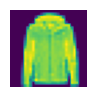

In [23]:
import matplotlib.pyplot as plt

print("Image shape: " + str(X_train[0].shape) + "\n")

plt.figure(figsize=(1, 1))
plt.imshow(X_train[0])
plt.axis("off")
plt.show()

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-09-22 13:16:34.325936: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-22 13:16:34.326261: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


In [26]:
#Alternative way of doing the same:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.layers

In [32]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [33]:
model.get_layer('dense_3') is hidden1

True

In [36]:
weights, biases = hidden1.get_weights()
weights, weights.shape

(array([[-0.00514141,  0.02194236, -0.01781379, ...,  0.07382935,
         -0.02373501,  0.06358339],
        [-0.03367042,  0.01164905, -0.05591521, ..., -0.05726631,
         -0.01404398,  0.00208317],
        [-0.03174377,  0.07203485, -0.01024017, ...,  0.02401216,
         -0.00873   ,  0.04127569],
        ...,
        [-0.00272794, -0.05984571, -0.01982886, ..., -0.00322458,
         -0.04756613,  0.06375334],
        [-0.00157102, -0.02240926, -0.02162092, ..., -0.02173708,
         -0.02743725, -0.00642075],
        [-0.02475765, -0.01893289,  0.03171214, ...,  0.03322469,
         -0.06970531,  0.0434451 ]], dtype=float32),
 (784, 300))

In [37]:
biases, biases.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [38]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [39]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    validation_data=(X_valid, y_valid)
)

Epoch 1/30


2022-09-22 13:35:13.693673: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-22 13:35:13.831804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7339 - accuracy: 0.7603

2022-09-22 13:35:23.813708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 11s 5ms/step - loss: 0.7339 - accuracy: 0.7603 - val_loss: 0.5025 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4890 - accuracy: 0.8298 - val_loss: 0.4492 - val_accuracy: 0.8476
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4443 - accuracy: 0.8434 - val_loss: 0.4222 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4175 - accuracy: 0.8532 - val_loss: 0.3983 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3967 - accuracy: 0.8602 - val_loss: 0.3932 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3811 - accuracy: 0.8655 - val_loss: 0.3900 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3673 - accuracy: 0.8702 - val_loss: 0.3700 - val_accuracy: 0.8690
Ep

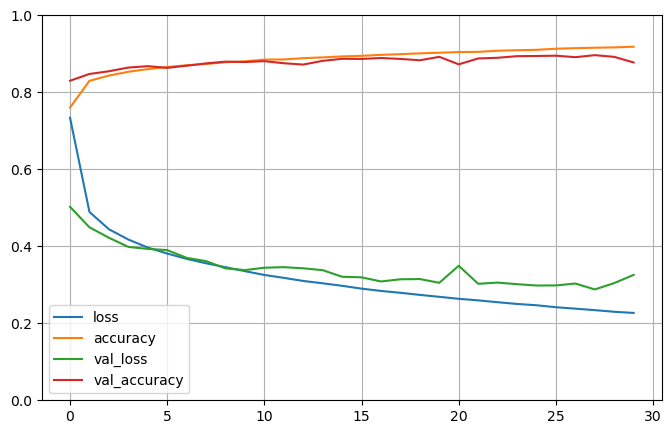

In [40]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3601 - accuracy: 0.8672


[0.36007604002952576, 0.8672000169754028]

In [42]:
#We now make predictions using the trained model
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 124ms/step


2022-09-22 13:59:10.940833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

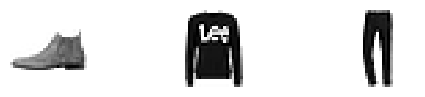

In [46]:
import matplotlib as mpl

fig = plt.figure(figsize=(6, 1))
for index in range(3):
    sub = fig.add_subplot(1, 3, index + 1)
    sub.imshow(X_new[index], cmap = mpl.cm.binary, interpolation="nearest")
    sub.axis("off")

In [71]:
proba_index = y_proba.argmax(axis=1)
[class_names[index] for index in proba_index]

['Ankle boot', 'Pullover', 'Trouser']

In [69]:
y_test[:3], proba_index

(array([9, 2, 1], dtype=uint8), array([9, 2, 1]))

Regression DNN using Keras Sequential API

In [74]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [78]:
X_train.shape

(11610, 8)

In [81]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(1)
])
model.compile(
    loss="mean_squared_error",
    optimizer="sgd"
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                270       
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [82]:
history = model.fit(
    X_train, y_train,
    epochs = 20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
 45/363 [==>...........................] - ETA: 1s - loss: 2.3776

2022-09-22 14:54:28.347410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.4239

2022-09-22 14:54:29.682282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 4ms/step - loss: 1.4239 - val_loss: 0.7082
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5759 - val_loss: 0.4839
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4624 - val_loss: 0.4238
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4297 - val_loss: 0.4056
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4116 - val_loss: 0.3984
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4047 - val_loss: 0.3848
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3944 - val_loss: 0.3813
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3942 - val_loss: 0.3770
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3976 - val_loss: 0.3780
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3915 - val_loss: 0.3686
Epoch 11/2

In [83]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3695


In [86]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred.flatten(), y_test[:3]

1/1 [==============================] - 0s 12ms/step


(array([1.2620873, 1.7111522, 1.8400514], dtype=float32),
 array([1.518, 1.056, 1.95 ]))

Building complex models using the Functional API

In [93]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [94]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 30)           930         ['dense_17[0][0]']               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_18[0][0]']         

/Users/amqo/Develop/ML/miniconda3/envs/handsOnTensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [95]:
history = model.fit(
    X_train, y_train,
    epochs = 20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
 27/363 [=>............................] - ETA: 1s - loss: 5.3173 

2022-09-22 17:08:03.047183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


356/363 [============================>.] - ETA: 0s - loss: 1.6754

2022-09-22 17:08:04.554729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 1.6579 - val_loss: 0.7661
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7173 - val_loss: 0.6787
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6589 - val_loss: 0.6340
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6231 - val_loss: 0.6017
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5944 - val_loss: 0.5768
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5714 - val_loss: 0.5548
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5518 - val_loss: 0.5368
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5356 - val_loss: 0.5210
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5215 - val_loss: 0.5078
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5096 - val_loss: 0.4978
Epoch 11/2

In [96]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.4582


In [97]:
#Here we send a subset of the features through the wide path, and a different one throught the deep path
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [99]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_20 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_21 (Dense)               (None, 30)           930         ['dense_20[0][0]']               
                                                                                            

In [102]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(
    (X_train_A, X_train_B), y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid)
)

Epoch 1/20
  1/363 [..............................] - ETA: 1:38 - loss: 4.2121

2022-09-22 17:13:39.479190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 2.0101

2022-09-22 17:13:41.196053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 5ms/step - loss: 2.0101 - val_loss: 0.9304
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8550 - val_loss: 0.7605
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7415 - val_loss: 0.6999
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6951 - val_loss: 0.6643
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6630 - val_loss: 0.6377
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6378 - val_loss: 0.6148
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6165 - val_loss: 0.5952
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5989 - val_loss: 0.5802
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5848 - val_loss: 0.5692
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5736 - val_loss: 0.5584
Epoch 11/2

In [103]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.5212


In [107]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred.flatten(), y_test[:3]

1/1 [==============================] - 0s 13ms/step


(array([1.0752462, 1.8871574, 1.7042136], dtype=float32),
 array([1.518, 1.056, 1.95 ]))

In [110]:
#Adding extra outputs, here we add an aux. output that will make that segment of the network learn something on its own, without dependint on the rest of the network
#This aux output can be used for regularization, as a common use case
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [111]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_24 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_25 (Dense)               (None, 30)           930         ['dense_24[0][0]']               
                                                                                            

In [113]:
#Each output has its own loss function, and we need to set the weights, in this case making the main one to get most of it, for the training to focus 90% on improving the main output
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
 10/363 [..............................] - ETA: 2s - loss: 4.0994 - main_output_loss: 3.8440 - aux_output_loss: 6.3984  

2022-09-22 17:30:16.154605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 0.9922 - main_output_loss: 0.8372 - aux_output_loss: 2.3874

2022-09-22 17:30:18.531116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 8ms/step - loss: 0.9922 - main_output_loss: 0.8372 - aux_output_loss: 2.3874 - val_loss: 0.5878 - val_main_output_loss: 0.5304 - val_aux_output_loss: 1.1046
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5680 - main_output_loss: 0.5154 - aux_output_loss: 1.0419 - val_loss: 0.5096 - val_main_output_loss: 0.4607 - val_aux_output_loss: 0.9496
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5108 - main_output_loss: 0.4668 - aux_output_loss: 0.9068 - val_loss: 0.4720 - val_main_output_loss: 0.4315 - val_aux_output_loss: 0.8370
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4766 - main_output_loss: 0.4395 - aux_output_loss: 0.8107 - val_loss: 0.4534 - val_main_output_loss: 0.4201 - val_aux_output_loss: 0.7530
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4569 - main_output_loss: 0.4258 - aux_output_loss: 0.7366 - val_loss: 0.4337 - 

In [114]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 1s 4ms/step - loss: 0.3938 - main_output_loss: 0.3808 - aux_output_loss: 0.5113


In [117]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main.flatten(), y_pred_aux.flatten()

1/1 [==============================] - 0s 13ms/step


(array([1.0335037, 1.7891495, 1.773598 ], dtype=float32),
 array([1.3626611, 1.7393243, 2.486218 ], dtype=float32))

Using the Subclassing API to build Dynamic Models

In [132]:
#Here we are creating exactly the same model as the last one, but using the subclassing API
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [134]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
  9/363 [..............................] - ETA: 2s - loss: 5.1271 - output_1_loss: 4.9497 - output_2_loss: 6.7242  

2022-09-22 17:52:20.660500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.0012 - output_1_loss: 0.8842 - output_2_loss: 2.0539

2022-09-22 17:52:23.023356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 7ms/step - loss: 1.0012 - output_1_loss: 0.8842 - output_2_loss: 2.0539 - val_loss: 0.5592 - val_output_1_loss: 0.4985 - val_output_2_loss: 1.1055
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.6144 - output_1_loss: 0.5690 - output_2_loss: 1.0229 - val_loss: 0.8773 - val_output_1_loss: 0.8607 - val_output_2_loss: 1.0271
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.5307 - output_1_loss: 0.4903 - output_2_loss: 0.8944 - val_loss: 0.4793 - val_output_1_loss: 0.4422 - val_output_2_loss: 0.8135
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4826 - output_1_loss: 0.4490 - output_2_loss: 0.7849 - val_loss: 0.4490 - val_output_1_loss: 0.4179 - val_output_2_loss: 0.7289
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4636 - output_1_loss: 0.4355 - output_2_loss: 0.7166 - val_loss: 0.4339 - val_output_1_loss: 0.4076 - val_output_2_loss

In [135]:
#When we use the summary() with this API, we get a list of layers with no info on how they are connected each other
model.summary()

Model: "wide_and_deep_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            multiple                  210       
                                                                 
 dense_47 (Dense)            multiple                  930       
                                                                 
 dense_48 (Dense)            multiple                  36        
                                                                 
 dense_49 (Dense)            multiple                  31        
                                                                 
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________
